<a href="https://colab.research.google.com/github/AllerLydia/Deep-Learning/blob/master/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt



In [ ]:
train_data = datasets.FashionMNIST(root= "data", 
                                   train = True,
                                   download = True,
                                   transform = ToTensor(),
                                   target_transform=None)

test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download = True,
                                  transform = ToTensor(),
                                  target_transform=None)

In [ ]:
len(test_data), len(train_data)

(10000, 60000)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

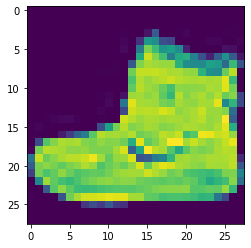

In [ ]:
plt.imshow(image.squeeze())

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset = train_data,
                          batch_size = 32,
                          shuffle=True)

test_loader = DataLoader(dataset = test_data,
                         batch_size = 32,
                         shuffle = False)

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_loader))
test_features_batch, test_labels_batch = next(iter(test_loader))
flattern_model = nn.Flatten()
x = train_features_batch[0]

output= flattern_model(x)



In [ ]:
class FashionMNISTModel_v1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)
model_0 = FashionMNISTModel_v1(
    input_shape=784,
    hidden_units = 10,
    output_shape = len(class_names)
)
model_0

FashionMNISTModel_v1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr = 0.1
)

In [ ]:
from tqdm.auto import tqdm

torch.manual_se


In [ ]:
epochs = 3
for epoch in tqdm(range(epochs)):
  train_loss = 0

  for batch, (X, y) in enumerate(train_loader):
    model_0.train()

    y_pred = model_0(X)

    loss= loss_fn(y_pred,y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"Look at {batch * len(X)} / {len(train_loader.dataset)} samples. ")
    
  train_loss = train_loss / len(train_loader)

  model_0.eval()
  with torch.inference_mode():



